In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")


In [135]:
df=pd.read_csv("/content/wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [137]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [138]:
df.shape

(178, 14)

In [139]:
df["Type"].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [140]:
df1=df.copy()

In [141]:
df.drop("Type",axis=1,inplace=True)


In [142]:
df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [143]:
df.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [144]:
sc=StandardScaler()
df[['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols','Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue','Dilution', 'Proline']]=sc.fit_transform(df[['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue','Dilution', 'Proline']])

In [145]:
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [146]:
pca=PCA(n_components=13)
df_pca=pca.fit_transform(df)

In [147]:
df_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [148]:
# the amount of variance that each pca explains
var=pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [149]:
#cumulative variance
var1=np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [150]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

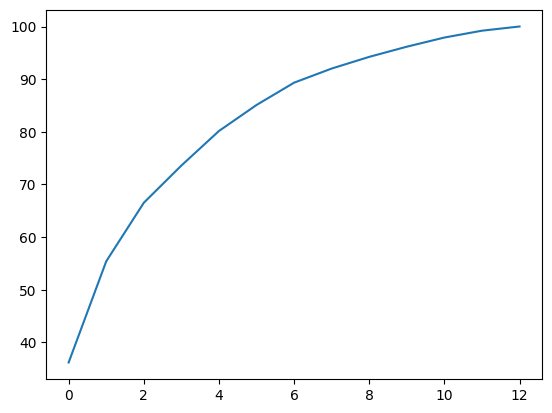

In [151]:
plt.plot(var1)
plt.show()

In [152]:
pcs=pd.DataFrame(df_pca[:,0:7],columns=["pc1","pc2","pc3","pc4","pc5","pc6","pc7"])

In [153]:
finaldf=pd.concat([df1["Type"],pcs],axis=1)

In [154]:
finaldf

,Type,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,1,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427
1,1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776
2,1,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205
3,1,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337
4,1,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074
...,...,...,...,...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416
174,3,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894
175,3,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235
176,3,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975


<Axes: xlabel='pc1', ylabel='pc2'>

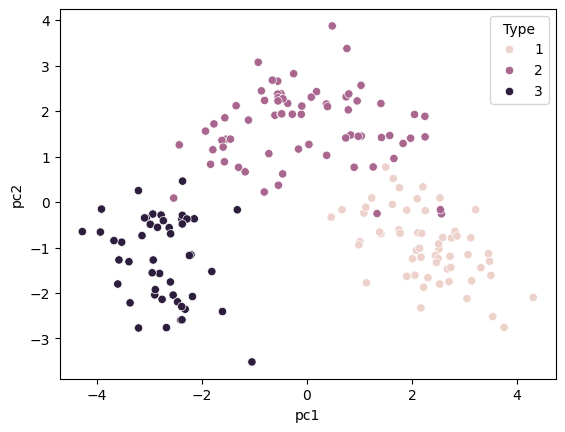

In [155]:
sns.scatterplot(data=finaldf,x="pc1",y="pc2",hue="Type")

<Axes: xlabel='pc3', ylabel='pc4'>

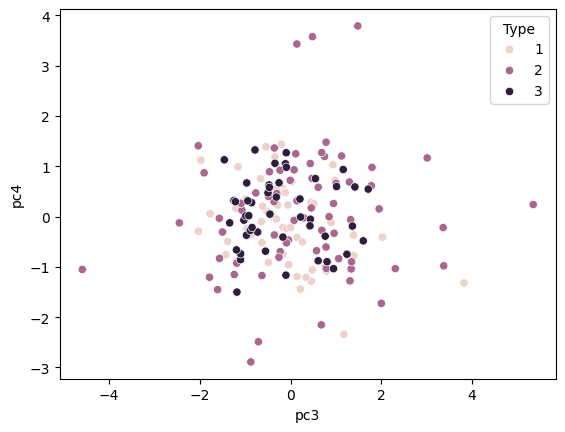

In [156]:
sns.scatterplot(data=finaldf,x="pc3",y="pc4",hue="Type")

<Axes: xlabel='pc5', ylabel='pc6'>

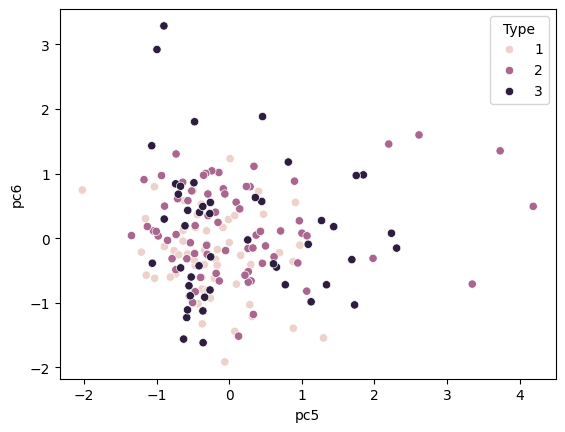

In [157]:
sns.scatterplot(data=finaldf,x="pc5",y="pc6",hue="Type")

<Axes: xlabel='pc6', ylabel='pc7'>

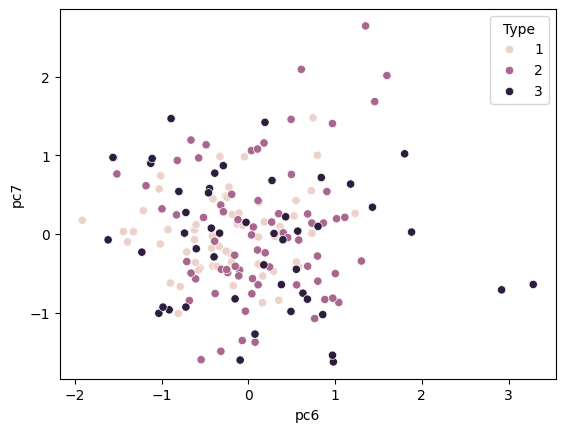

In [158]:
sns.scatterplot(data=finaldf,x="pc6",y="pc7",hue="Type")

<Axes: >

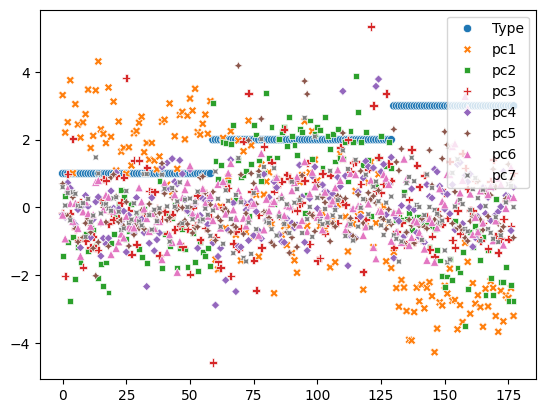

In [159]:
sns.scatterplot(data=finaldf)

In [160]:
pcs_1=pd.DataFrame(df_pca[:,0:3],columns=["pc1","pc2","pc3"])

In [161]:
finaldf_1=pd.concat([df1["Type"],pcs_1],axis=1)

<Axes: >

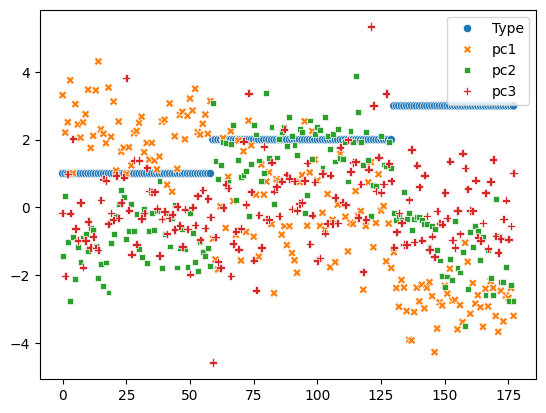

In [162]:
sns.scatterplot(data=finaldf_1)

Checking the optimum no of clusters of original data with first 3 principal component scores


# **Hierarchial clustering**

In [163]:
#we have already normlize the data
#using normalization to draw dendogram

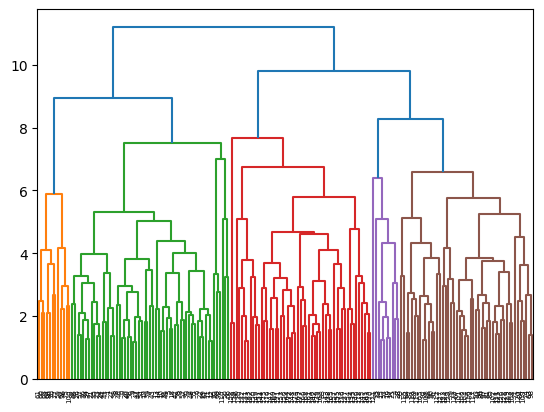

In [164]:
dendrogram=sch.dendrogram(sch.linkage(df,method='complete'))
plt.show()

In [165]:
h_df=df1.copy()

In [166]:
df1.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [167]:
df1.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [168]:
df1[['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols','Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue','Dilution', 'Proline']]=sc.fit_transform(df[['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols','Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue','Dilution', 'Proline']])

In [169]:
df1.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [170]:
h_cluster=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage='complete')
h_cluster

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [171]:
y=pd.DataFrame(h_cluster.fit_predict(df1),columns=['h_clusterid'])
y['h_clusterid'].value_counts()

0    119
1     49
2     10
Name: h_clusterid, dtype: int64

In [172]:
h_df["h_clusterid"]=h_cluster.labels_
h_df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


# **K-means Clustering**

In [173]:
k_df=df1.copy()

In [174]:
k_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [175]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(k_df.iloc[:,1:])
  wcss.append(kmeans.inertia_)

In [176]:
wcss

[2314.0,
 1659.0079672511501,
 1277.9284888446423,
 1175.3789993448743,
 1114.3619360443238,
 1055.3192719189651,
 997.403103439344,
 944.1868407637301,
 906.2209178639189,
 857.8271492632507]

<Axes: >

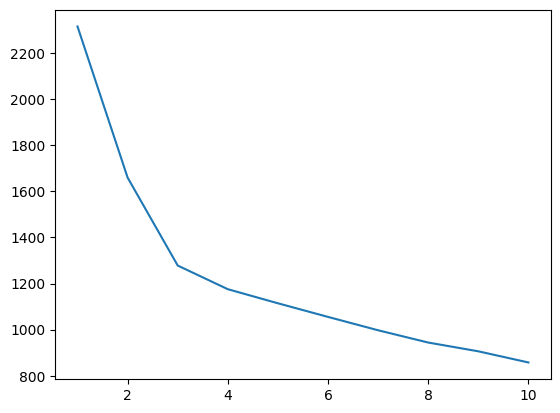

In [177]:
sns.lineplot(x=range(1,11),y=wcss)

In [178]:
from sklearn.metrics import silhouette_score

In [179]:
kmeans=KMeans(n_clusters=3)
predict=kmeans.fit_predict(k_df.iloc[:,1:])

In [180]:
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [181]:
k_df['clusterid']=kmeans.labels_


In [198]:
k_df['clusterid'].value_counts()

2    65
0    62
1    51
Name: clusterid, dtype: int64

In [182]:
kmeans.cluster_centers_

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

In [183]:
df_1 = k_df.groupby("clusterid").mean().reset_index()
df_1

,clusterid,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0,1.048387,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185
1,1,2.941176,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
2,2,2.000000,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846


In [184]:
k_df["Type"][k_df["clusterid"]==1]

61     2
83     2
118    2
130    3
131    3
132    3
133    3
134    3
135    3
136    3
137    3
138    3
139    3
140    3
141    3
142    3
143    3
144    3
145    3
146    3
147    3
148    3
149    3
150    3
151    3
152    3
153    3
154    3
155    3
156    3
157    3
158    3
159    3
160    3
161    3
162    3
163    3
164    3
165    3
166    3
167    3
168    3
169    3
170    3
171    3
172    3
173    3
174    3
175    3
176    3
177    3
Name: Type, dtype: int64

In [185]:
label_0=k_df[predict==0]
label_2=k_df[predict==1]
label_3=k_df[predict==2]

In [186]:
label_1

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1,0.357463,-0.328857,1.145888,-0.809251,0.158572,1.129464,1.205493,-0.417829,0.121071,0.407442,0.493797,0.322481,1.665830,1
58,1,0.888627,-0.813595,0.487926,-0.839280,0.579852,1.770396,1.647239,-1.384766,0.786863,0.753498,-0.295924,0.364855,1.713598,1
73,2,-0.013116,-0.598156,0.853460,3.154511,2.756465,1.610163,0.864145,-1.223610,0.646696,-0.738868,1.546759,1.254694,0.758249,1
95,2,-0.655454,-0.732806,-0.608676,-0.148624,4.371372,0.328298,0.241685,-0.337251,2.959447,-1.063296,0.888658,0.025868,0.605394,1


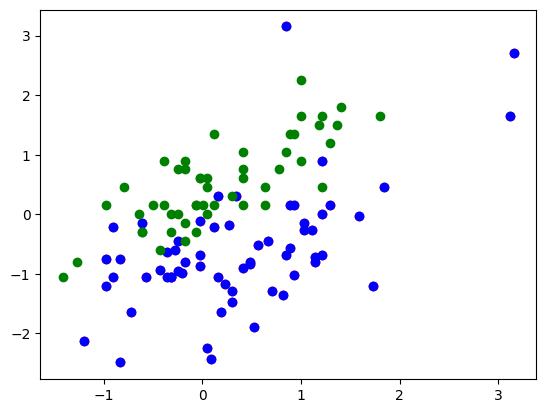

In [187]:
cols=k_df.iloc[:,1:].columns

plt.scatter(label_0[cols[2]], label_0[cols[3]], color= 'red')
plt.scatter(label_1[cols[2]], label_1[cols[3]], color= 'blue')
plt.scatter(label_2[cols[2]], label_2[cols[3]], color= 'green')
plt.show()

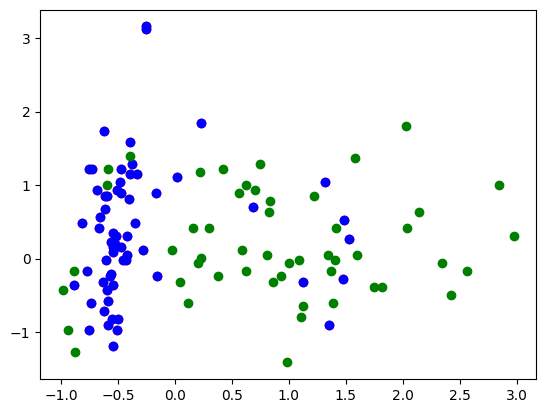

In [188]:
plt.scatter(label_0[cols[1]], label_0[cols[2]], color= 'red')
plt.scatter(label_1[cols[1]], label_1[cols[2]], color= 'blue')
plt.scatter(label_2[cols[1]], label_2[cols[2]], color= 'green')
plt.show()

In [196]:
wcss1=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(finaldf.iloc[:,1:])
  wcss1.append(kmeans.inertia_)


In [191]:
finaldf

,Type,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,1,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427
1,1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776
2,1,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205
3,1,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337
4,1,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074
...,...,...,...,...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416
174,3,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894
175,3,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235
176,3,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975


<Axes: >

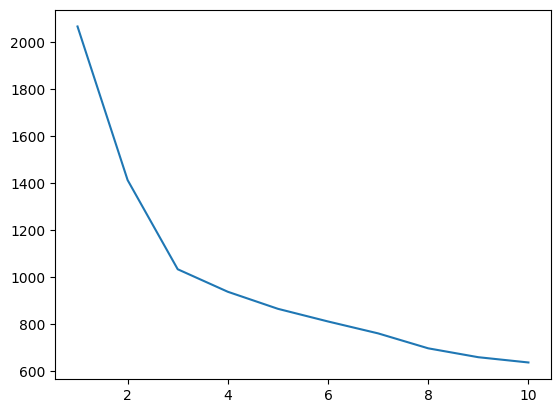

In [197]:
sns.lineplot(x=range(1,11),y=wcss1)

# From the Graph the optimum no of cluster is K=3 and builded K-Means clustering as cluster=3




